# Consolidation of wealth

Let's consider a game in which all contestants get 100 at a start. Then they play the following game: <br>
<ul>
    <li> for every round players are randomly divided to pairs</li>
    <li> each pair tosses a coin 'n_plays_in_round' times. </li>
    <li> for every heads: 10€ from person A gets transfered to person B </li>
    <li> for every tails: 10€ from person B gets transfered to person A </li>
</ul>
The result is that eventually all money is transfered to one player and everyone else is broke

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
class Contestant(object):
    
    def __init__(self, name, money=100, increment=10):
        self._name = name
        self._money = money
        self.increment = increment
        self.history = []
        
    def get_money(self):
        return self._money
    
    def get_name(self):
        return self._name
    
    def is_broke(self):
        if self._money == 0:
            return True
        else:
            return False
    
    def increase_money(self):
        self._money += self.increment
        
    def decrease_money(self):
        self._money -= self.increment
        
    def record_history(self):
        self.history.append(self.get_money())

In [3]:
class Game(object):
    def __init__(self, n_plays_in_round, contestants):
        self.n_plays_in_round = n_plays_in_round
        self.contestants = contestants
        self.bankrupts = {}
        
    def play_game_for_pair(self, contestant_1, contestant_2):
        for _ in range(self.n_plays_in_round):
            if random.random() > 0.5:
                contestant_1.increase_money()
                contestant_2.decrease_money()
            else:
                contestant_2.increase_money()
                contestant_1.decrease_money()
            
            contestant_1.record_history()
            contestant_2.record_history()
            if contestant_1.is_broke():
                self.make_bankrupt(contestant_1.get_name())
                break
            elif contestant_2.is_broke():
                self.make_bankrupt(contestant_2.get_name())
                break
            
    def make_bankrupt(self, contestant_name):
        self.bankrupts[contestant_name] = self.contestants[contestant_name]
        del self.contestants[contestant_name]
        
    def play_rounds(self, n_rounds):
        for i in range(n_rounds):
            self.play_round()
    
    def play_round(self):
        players = np.random.permutation(list(self.contestants.values()))
        if len(self.contestants) == 1:
            return False
        for c1, c2 in zip(players[::2], players[1::2]):
            self.play_game_for_pair(c1, c2)
                
    def play_till_end(self):
        while True:
            if self.play_round() is False:
                break

In [4]:
n_plays_in_round = 10
n_contestants = 20
game = Game(n_plays_in_round, {"contestant_" + str(i): Contestant("contestant_" + str(i)) for i in range(n_contestants)})

In [5]:
game.play_till_end()

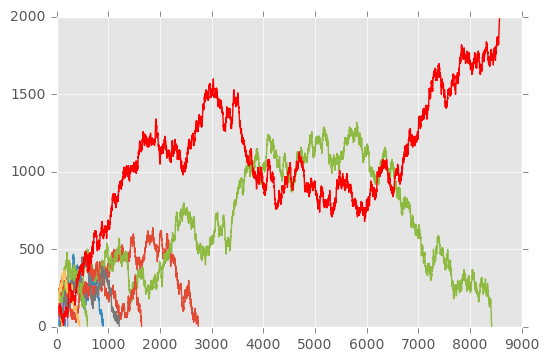

In [9]:
for player in game.bankrupts.values():
    plt.plot(player.history)
plt.plot(list(game.contestants.values())[0].history, color="red")
plt.show()